In [51]:
#LOADING DEPENDENCIES
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics #df = pd.merge(df,stores_df,how = 'Bottom',on = ['Store'])
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

In [53]:
#LOAD TRAIN DATASET
df = pd.read_csv('/content/train.csv')
#LOAD FEATURES DATASET AND JOIN IT WITH TRAIN DATA
df.head()
df.drop('IsHoliday',axis=1)
#LOAD STORE DATASET AND JOIN WITH ABOVE DATA
#stores_df = pd.read_csv('C:/Users/USER/Pictures/Data/stores.csv')
print(df.shape)

(207323, 5)


<ipython-input-53-7419f093bf31>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/train.csv')


In [54]:
features_df = pd.read_csv('/content/features.csv')
features_df=features_df.drop('IsHoliday',axis=1)

In [55]:
df=df.merge(features_df,how='inner', on =['Store','Date'])


In [56]:
stores_df = pd.read_csv('/content/stores.csv')
df=df.merge(stores_df,how='inner', on ='Store')

In [57]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [58]:
df.shape

(207323, 16)

In [59]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            1
Temperature          0
Fuel_Price           0
MarkDown1       132951
MarkDown2       148285
MarkDown3       138217
MarkDown4       133621
MarkDown5       132951
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207323 entries, 0 to 207322
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         207323 non-null  int64  
 1   Dept          207323 non-null  int64  
 2   Date          207323 non-null  object 
 3   Weekly_Sales  207323 non-null  float64
 4   IsHoliday     207322 non-null  object 
 5   Temperature   207323 non-null  float64
 6   Fuel_Price    207323 non-null  float64
 7   MarkDown1     74372 non-null   float64
 8   MarkDown2     59038 non-null   float64
 9   MarkDown3     69106 non-null   float64
 10  MarkDown4     73702 non-null   float64
 11  MarkDown5     74372 non-null   float64
 12  CPI           207323 non-null  float64
 13  Unemployment  207323 non-null  float64
 14  Type          207323 non-null  object 
 15  Size          207323 non-null  int64  
dtypes: float64(10), int64(3), object(3)
memory usage: 26.9+ MB


In [61]:
df[['Weekly_Sales','Temperature','CPI','Size']].describe()

,Weekly_Sales,Temperature,CPI,Size
count,207323.000000,207323.000000,207323.000000,207323.000000
mean,17687.247272,60.761650,179.792177,144628.262865
std,25112.020937,18.498839,40.080622,58146.692791
min,-1699.000000,-2.060000,126.064000,34875.000000
25%,2735.035000,47.550000,131.784000,112238.000000
50%,8446.260000,62.940000,195.874257,140167.000000
75%,21732.945000,75.340000,215.277268,202505.000000
max,693099.360000,99.220000,227.232807,219622.000000


In [62]:
#EXPLORING THE RANGE OF DATES FOR WHICH THE WEEKLY SALES DATA IS AVAILABLE.
print('Min Date in Data is - {}'.format(df['Date'].min()))
print('Max Date in Data is - {}'.format(df['Date'].max()))

Min Date in Data is - 2010-02-05
Max Date in Data is - 2012-10-26


FILLING EMPTY SPACES

In [63]:
#IMPUTE NULL VALUES
df['MarkDown1'] = df['MarkDown1'].fillna(df['MarkDown1'].mean())
df['MarkDown2'] = df['MarkDown2'].fillna(df['MarkDown2'].mean())
df['MarkDown3'] = df['MarkDown3'].fillna(df['MarkDown3'].mean())
df['MarkDown4'] = df['MarkDown4'].fillna(df['MarkDown4'].mean())
df['MarkDown5'] = df['MarkDown5'].fillna(df['MarkDown5'].mean())

In [64]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,A,151315


EDA

<Axes: xlabel='Type', ylabel='Size'>

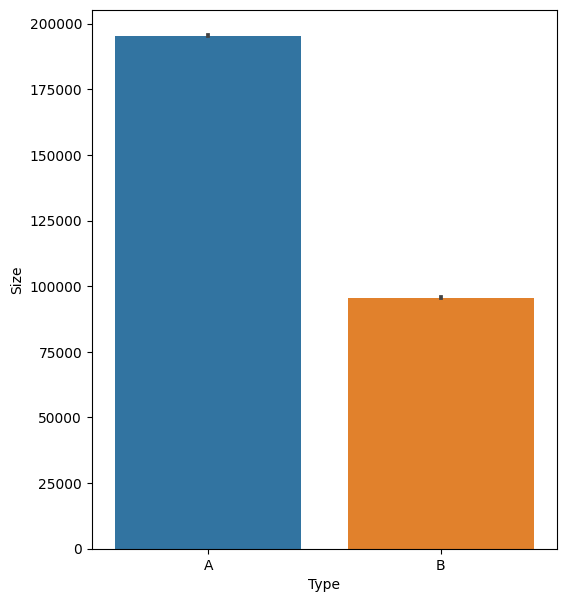

In [65]:
#SIZE DISTRIBUTION OF THE STORES FOR EACH STORE TYPE
plt.figure(figsize = (6,7))
sns.barplot(x = 'Type', y ='Size',data = df)

  Type  Store
0    A     10
1    B     12


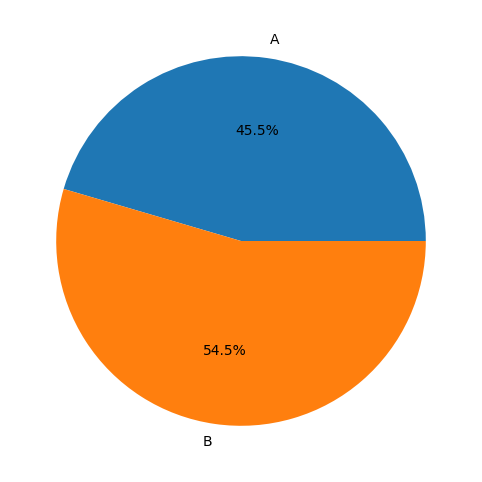

In [66]:
temp = pd.DataFrame(df.groupby('Type')['Store'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (8,6))
plt.pie(temp['Store'],labels = temp['Type'],autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

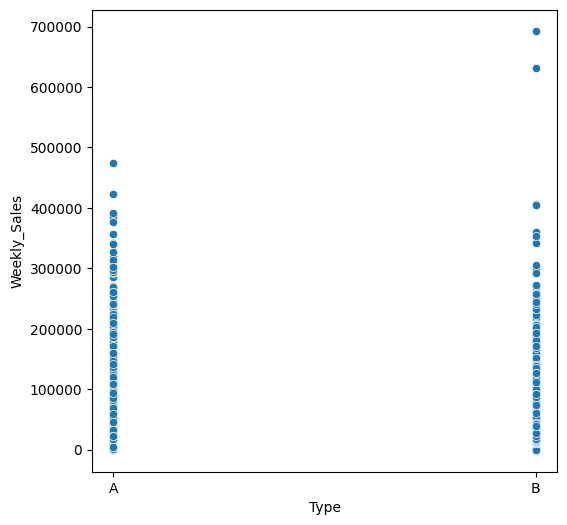

In [67]:
#DISTRIBUTION OF WEEKLY SALES BASED ON STORE TYPE
plt.figure(figsize = (6,6))
sns.scatterplot(x ='Type',y = 'Weekly_Sales',data = df)

<ipython-input-68-32ab14ed9f6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

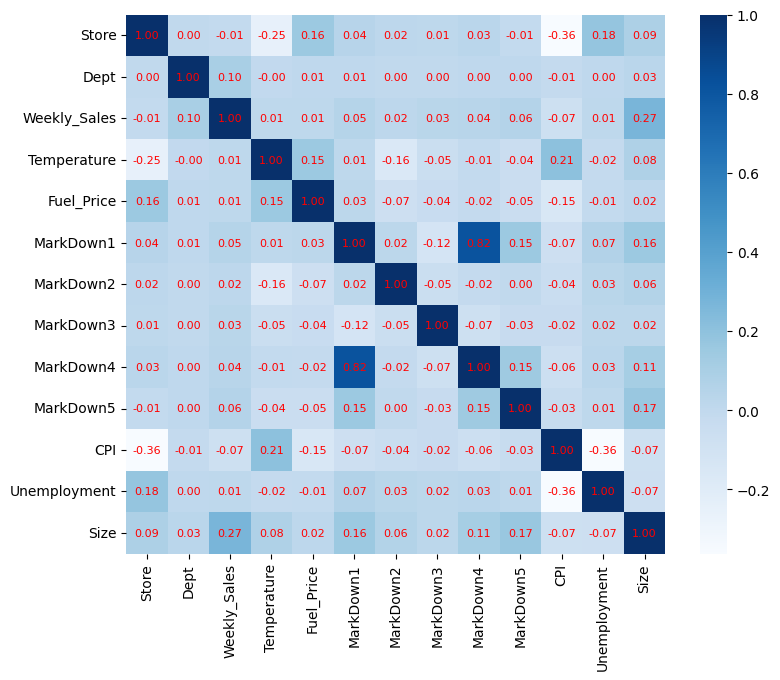

In [68]:
#ANALYZING THE CORRELATION BETWEEN NUMERICAL FEATURES AND WEEKLY SALES USING A HEATMAP
correlation=df.corr() 
plot2=plt.figure(figsize=(9,7))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8,'color':'red'},cmap='Blues')

CLEANING

REMOVED THE NULL VALUES

In [69]:
print(df['MarkDown2'])

0         3649.988552
1         3649.988552
2         3649.988552
3         3649.988552
4         3649.988552
             ...     
207318      23.730000
207319    3649.988552
207320    3649.988552
207321    3649.988552
207322     111.860000
Name: MarkDown2, Length: 207323, dtype: float64


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Dept'}>,
        <Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'MarkDown1'}>,
        <Axes: title={'center': 'MarkDown2'}>,
        <Axes: title={'center': 'MarkDown3'}>],
       [<Axes: title={'center': 'MarkDown4'}>,
        <Axes: title={'center': 'MarkDown5'}>,
        <Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Unemployment'}>],
       [<Axes: title={'center': 'Size'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

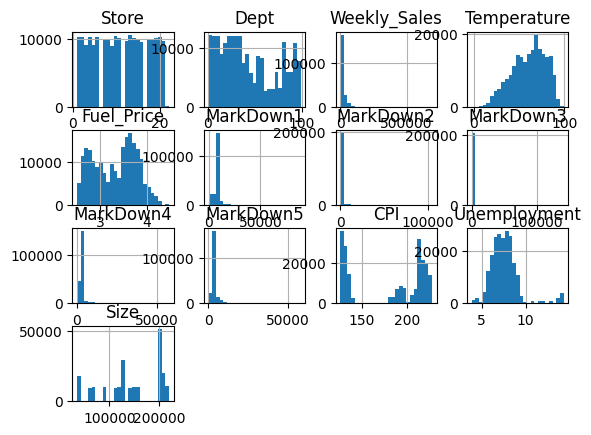

In [70]:
df.hist(bins=25)

REMOVING OUTLIERS

In [71]:
# Z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Weekly_Sales']))
print(z)
#df.drop(df['Weekly_Sales'])


0         0.288199
1         1.310850
2         0.157181
3         0.886701
4         0.579092
            ...   
207318    0.043474
207319    0.031243
207320    0.195600
207321    0.374514
207322    0.847634
Name: Weekly_Sales, Length: 207323, dtype: float64


<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales_log'>

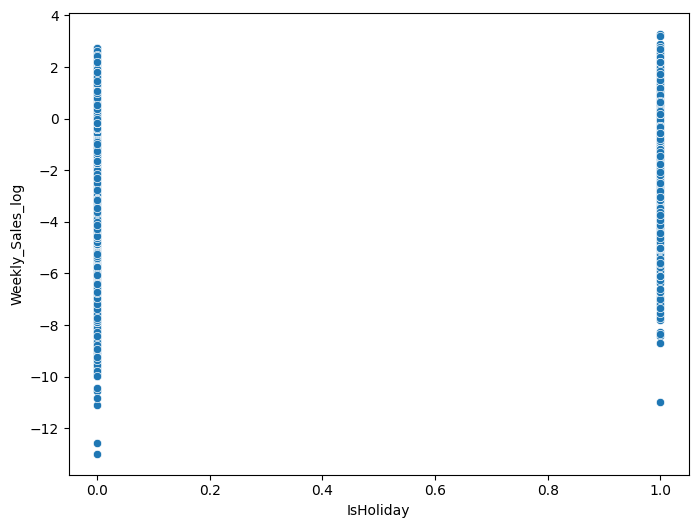

In [72]:
df['Weekly_Sales_log']=np.log(z)
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'IsHoliday',y ='Weekly_Sales_log',data = df)

NORMALIZING DATA

In [73]:
#MIN_MAX
def min_max(array):
    mini=min(array)
    maxi=max(array)
    for i in range(len(array)):
        array[i]=(array[i]-mini)/(maxi-mini)


In [74]:
array=np.asarray(df['Fuel_Price'])
min_max(array)

In [75]:
df['Fuel_log']=pd.DataFrame(array)

<Axes: >

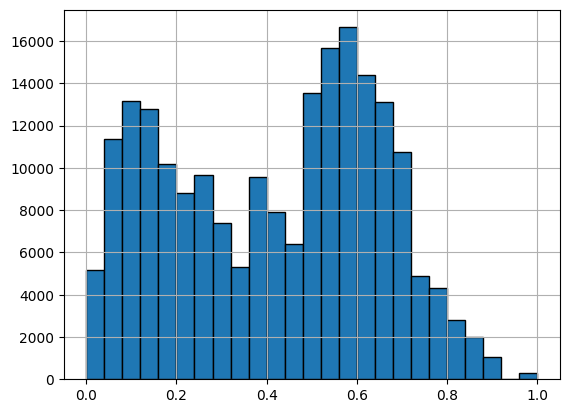

In [76]:
df['Fuel_log'].hist(edgecolor='black',bins=25) #updated histogram

In [77]:
print(df)

        Store  Dept        Date  Weekly_Sales IsHoliday  Temperature  \
0           1     1  2010-02-05      24924.50     False        42.31   
1           1     2  2010-02-05      50605.27     False        42.31   
2           1     3  2010-02-05      13740.12     False        42.31   
3           1     4  2010-02-05      39954.04     False        42.31   
4           1     5  2010-02-05      32229.38     False        42.31   
...       ...   ...         ...           ...       ...          ...   
207318     22     1  2012-09-28      16595.53     False        62.17   
207319     22     1  2012-10-05      18471.82     False        62.09   
207320     22     1  2012-10-12      22599.14     False        54.18   
207321     22     1  2012-10-19      27092.03     False        55.28   
207322     22     1  2012-10-26      38973.00     False        57.58   

        Fuel_Price    MarkDown1    MarkDown2    MarkDown3    MarkDown4  \
0         0.029683  7982.850247  3649.988552  1728.377859  34

MODEL TRAINING


In [78]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales_log,Fuel_log
0,1,1,2010-02-05,24924.50,False,42.31,0.029683,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,A,151315,-1.244103,0.029683
1,1,2,2010-02-05,50605.27,False,42.31,0.029683,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,A,151315,0.270676,0.029683
2,1,3,2010-02-05,13740.12,False,42.31,0.029683,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,A,151315,-1.850356,0.029683
3,1,4,2010-02-05,39954.04,False,42.31,0.029683,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,A,151315,-0.120248,0.029683
4,1,5,2010-02-05,32229.38,False,42.31,0.029683,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,A,151315,-0.546294,0.029683


#CONVERTING STRING TO NUMERIC

In [79]:
df['Type'].replace('A',1,inplace=True)
df['Type'].replace('B',0,inplace=True)
df['Type'].replace('C',2,inplace=True)

In [80]:
df['IsHoliday'].nunique()

2

In [81]:
df['IsHoliday'].replace('True',1,inplace=True)
df['IsHoliday'].replace('False',0,inplace=True)

In [82]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales_log,Fuel_log
0,1,1,2010-02-05,24924.50,False,42.31,0.029683,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,1,151315,-1.244103,0.029683
1,1,2,2010-02-05,50605.27,False,42.31,0.029683,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,1,151315,0.270676,0.029683
2,1,3,2010-02-05,13740.12,False,42.31,0.029683,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,1,151315,-1.850356,0.029683
3,1,4,2010-02-05,39954.04,False,42.31,0.029683,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,1,151315,-0.120248,0.029683
4,1,5,2010-02-05,32229.38,False,42.31,0.029683,7982.850247,3649.988552,1728.377859,3400.520879,4745.466338,211.096358,8.106,1,151315,-0.546294,0.029683


In [83]:
#SPLIT DATASET INTO TRAIN AND TEST
X=df.drop(['Weekly_Sales','Date','IsHoliday','Fuel_log','Weekly_Sales_log'],axis=1) #if droping row axis=0,droping vol axis=1
Y=df['Weekly_Sales']

In [84]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [85]:
#DEVELOPING ML MODELS


In [86]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 1234)
decision_tree_regressor.fit(x_train,y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {decision_tree_regressor.score(x_test,y_test)}')

MAE is - 2747.830330391164
RMSE is - 8001.029556969789
Accuracy Score is - 0.9014936321420959


<Axes: xlabel='Weekly_Sales'>

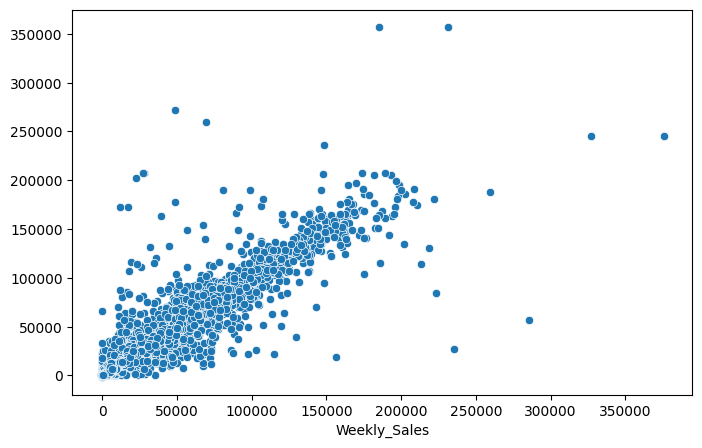

In [87]:
#SCATTER PLOT BETWEEN OBSERVED AND PREDICTED VALUES OF WEEKLY SALES FROM decisionTree REGRESSOR
plt.figure(figsize = (8,5))
sns.scatterplot(x = y_test, y = y_pred)

In [88]:
test = pd.read_csv('/content/test.csv')

In [89]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [90]:
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [91]:
print(Y.head())

0    24924.50
1    50605.27
2    13740.12
3    39954.04
4    32229.38
Name: Weekly_Sales, dtype: float64


In [92]:
input_data=(1,1 ,42.31,0.0501,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,1,151315)
input_data_array=np.asarray(input_data)
in_data=input_data_array.reshape(1,-1)
prediction=decision_tree_regressor.predict(in_data)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [93]:
print(prediction)

[24924.5]


In [94]:
df.shape

(207323, 18)